# Chicago Bears and Crime
## The effect a Chicago Bears win/lose streak has on Crime in Chicago

### Contents
- Data Preparation
- Chicago Bears results
- Crime in Chicago
- Chicago Bears Form
- Chicago Bears Streaks

In [184]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [185]:
if not os.path.exists( "../../data/prep/700_NFL.csv" ):
    print("Missing dataset file")

In [186]:
nfl = pd.read_csv("../../data/prep/700_NFL.csv", index_col="kickoff", parse_dates=True)
nfl.shape

(373, 6)

Sorting the dates of the games...

In [187]:
nfl.sort_index(ascending=True)

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Bills,14,15,Broncos,Away Win,-1
2007-09-09,Chargers,14,3,Bears,Home Win,11
2007-09-09,Vikings,24,3,Falcons,Home Win,21
2007-09-16,Bears,20,10,Chiefs,Home Win,10
2007-09-16,Broncos,23,20,Raiders,Home Win,3
2007-09-16,Lions,20,17,Vikings,Home Win,3
2007-09-23,Bears,10,34,Cowboys,Away Win,-24
2007-09-23,Broncos,14,23,Jaguars,Away Win,-9
2007-09-23,Chiefs,13,10,Vikings,Home Win,3


# Chicago Bears

We'll look at the Chicago Bears..

In [188]:
bea = nfl[(nfl.values  == "Bears")]

In [189]:
bea.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference
kickoff,,,,,,
2007-09-09,Chargers,14,3,Bears,Home Win,11
2007-09-16,Bears,20,10,Chiefs,Home Win,10
2007-09-23,Bears,10,34,Cowboys,Away Win,-24
2007-09-30,Lions,37,27,Bears,Home Win,10
2007-10-07,Packers,20,27,Bears,Away Win,-7


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [190]:
beaHome = bea[bea['Home/Neutral'] == 'Bears']

In [191]:
conditions = [
    (beaHome['PTS.1'] > beaHome['PTS']),
    (beaHome['PTS'] == beaHome['PTS.1'])]
choices = [1, 0]
beaHome['bea Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [192]:
beaHome.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bea Res
kickoff,,,,,,,
2007-09-16,Bears,20,10,Chiefs,Home Win,10,1
2007-09-23,Bears,10,34,Cowboys,Away Win,-24,-1
2007-10-14,Bears,31,34,Vikings,Away Win,-3,-1
2007-10-28,Bears,7,16,Lions,Away Win,-9,-1
2007-11-25,Bears,37,34,Broncos,Home Win,3,1


and now their away games...

In [193]:
beaAway = bea[bea['Visitor/Neutral'] == 'Bears']

In [194]:
conditions = [
    (beaAway['PTS'] > beaAway['PTS.1']),
    (beaAway['PTS'] == beaAway['PTS.1'])]
choices = [1, 0]
beaAway['bea Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [195]:
beaAway.head()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bea Res
kickoff,,,,,,,
2007-09-09,Chargers,14,3,Bears,Home Win,11,-1
2007-09-30,Lions,37,27,Bears,Home Win,10,-1
2007-10-07,Packers,20,27,Bears,Away Win,-7,1
2007-10-21,Eagles,16,19,Bears,Away Win,-3,1
2007-11-11,Raiders,6,17,Bears,Away Win,-11,1


We'll combine the 2 dataframes

In [196]:
fram1 = [beaHome, beaAway]
beaRes = pd.concat(fram1, axis = 0)

In [197]:
beaRes.tail()

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bea Res
kickoff,,,,,,,
2014-10-12,Falcons,13,27,Bears,Away Win,-14,1
2014-10-26,Patriots,51,23,Bears,Home Win,28,-1
2014-11-10,Packers,55,14,Bears,Home Win,41,-1
2014-11-28,Lions,34,17,Bears,Home Win,17,-1
2014-12-28,Vikings,13,9,Bears,Home Win,4,-1


The index is sorted again

In [198]:
beaRes = beaRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

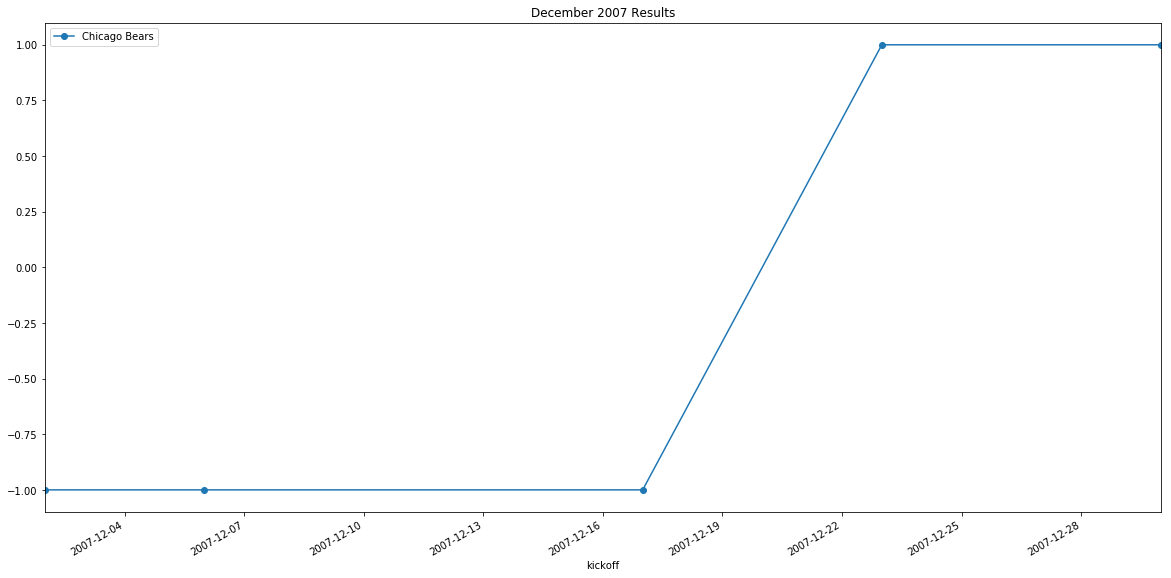

In [199]:
ctest2 = beaRes.loc['2007-12-02':'2007-12-30']
ctest2['bea Res'].plot(style='o-', figsize = (20, 10))
plt.title('December 2007 Results')
plt.legend(['Chicago Bears'])
plt.show

In [200]:
ctest3 = beaRes.loc['2009-11-02':'2010-06-30']
ctest3

,Home/Neutral,PTS.1,PTS,Visitor/Neutral,Result,Difference,bea Res
kickoff,,,,,,,
2009-11-08,Bears,21,41,Cardinals,Away Win,-20,-1
2009-11-12,49ers,10,6,Bears,Home Win,4,-1
2009-11-22,Bears,20,24,Eagles,Away Win,-4,-1
2009-11-29,Vikings,36,10,Bears,Home Win,26,-1
2009-12-06,Bears,17,9,Rams,Home Win,8,1
2009-12-13,Bears,14,21,Packers,Away Win,-7,-1
2009-12-20,Ravens,31,7,Bears,Home Win,24,-1
2009-12-28,Bears,36,30,Vikings,Home Win,6,1
2010-01-03,Lions,23,37,Bears,Away Win,-14,1


The unnecessary columns are now dropped...

In [201]:
beaRes= beaRes.drop('Visitor/Neutral', 1)
beaRes= beaRes.drop('PTS', 1)
beaRes= beaRes.drop('Home/Neutral', 1)
beaRes= beaRes.drop('PTS.1', 1)
beaRes= beaRes.drop('Result', 1)
beaRes= beaRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [202]:
start_remove = pd.to_datetime('2014-12-31')
end_remove = pd.to_datetime('2007-01-01')

In [203]:
beaRes = beaRes.loc[(beaRes.index < start_remove) & (beaRes.index > end_remove)]

In [204]:
beaRes.head()

,bea Res
kickoff,
2007-09-09,-1
2007-09-16,1
2007-09-23,-1
2007-09-30,-1
2007-10-07,1


# Chicago Crime

We now load in the Chicago crime dataset...

In [205]:
beacrime = pd.read_csv( "../../data/prep/110_Chicago.csv", index_col="Date", parse_dates=True)

In [206]:
beacrime.head()

,Primary Type
Date,
2015-03-18 21:30:00,Vandalism
2015-03-19 00:35:00,Vandalism
2015-03-18 22:45:00,Vandalism
2015-03-18 23:20:00,Vandalism
2015-03-19 02:55:00,Vandalism


Looking at crimes year by year...

<function matplotlib.pyplot.show>

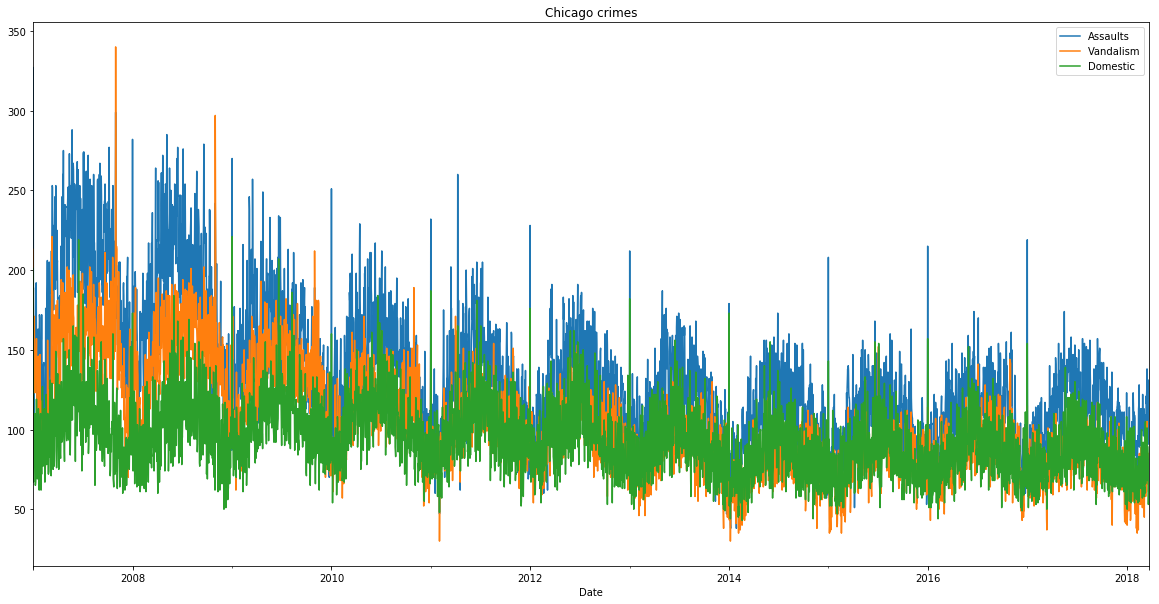

In [207]:
plt.subplot()

a1p = beacrime[beacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))


v1p = beacrime[beacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = beacrime[beacrime['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()

plt.title('Chicago crimes')
plt.legend(['Assaults', 'Vandalism', 'Domestic'])
plt.show

<function matplotlib.pyplot.show>

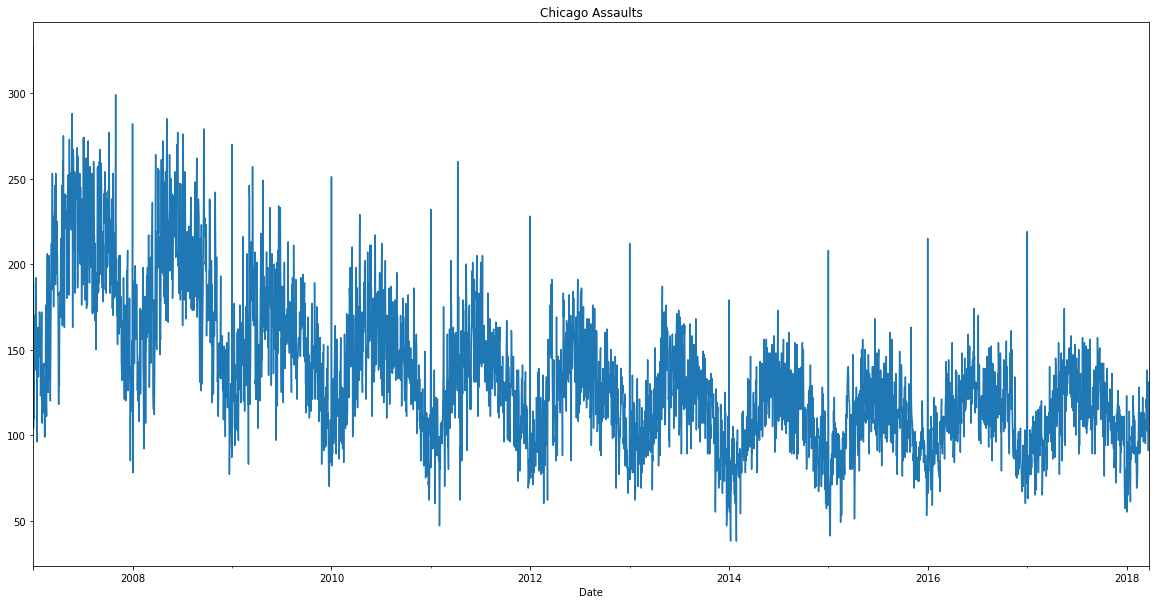

In [208]:
plt.subplot()

a1p = beacrime[beacrime['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Chicago Assaults')

plt.show

<function matplotlib.pyplot.show>

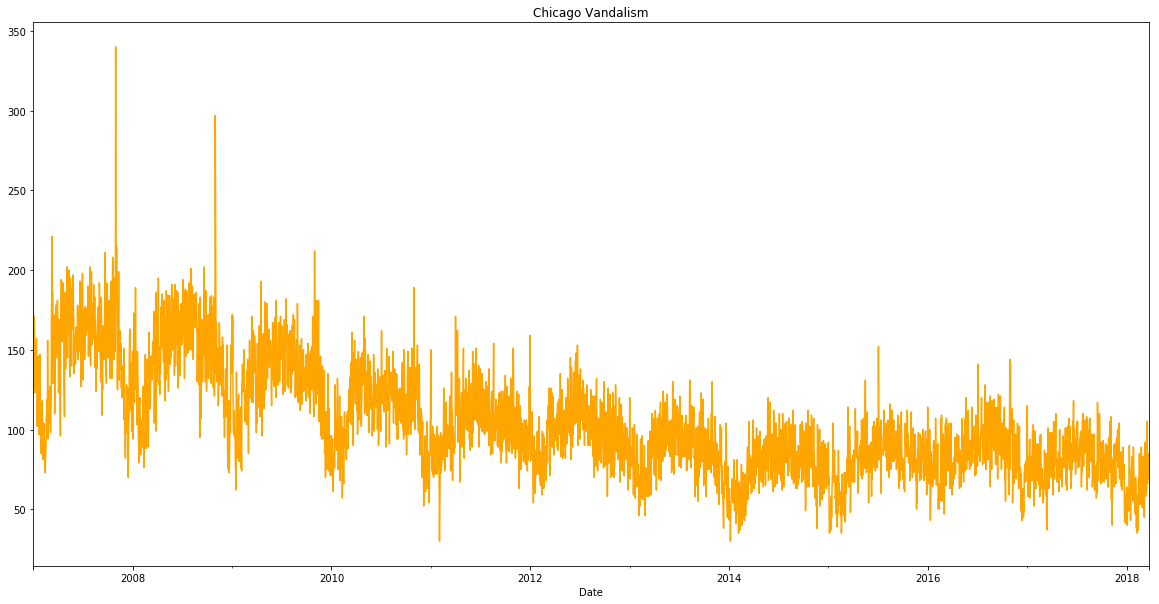

In [209]:
plt.subplot()


v1p = beacrime[beacrime['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Chicago Vandalism')

plt.show

<function matplotlib.pyplot.show>

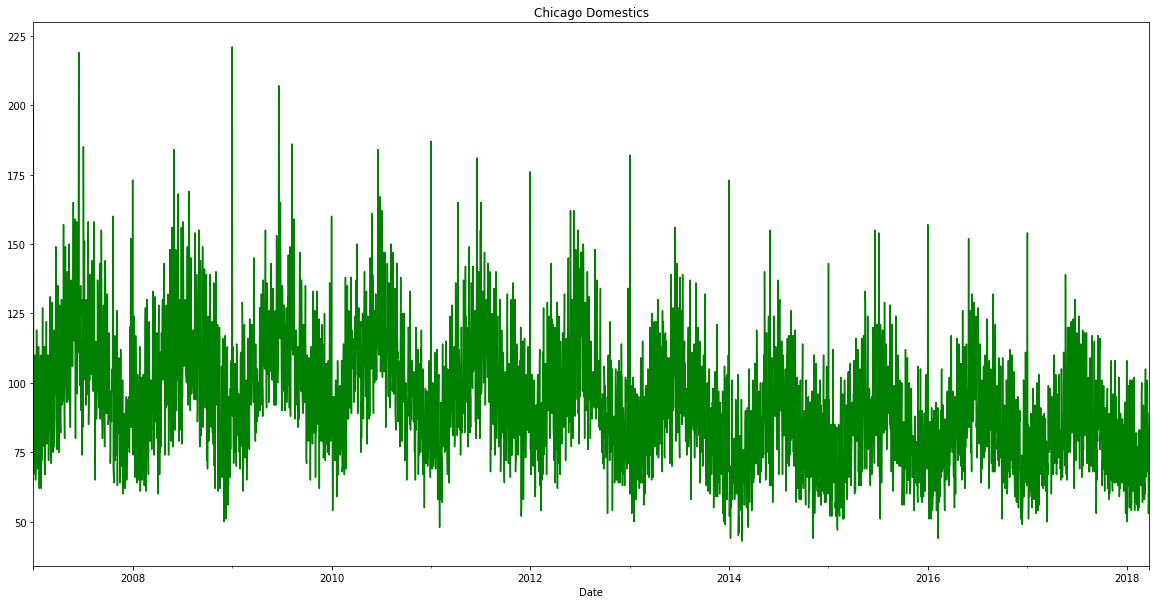

In [210]:
plt.subplot()

a1p = beacrime[beacrime['Primary Type'] == "Domestic"]['Primary Type']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Chicago Domestics')

plt.show

# Crime vs Results

A day by day comparison of Domestic violence and the games..

<function matplotlib.pyplot.show>

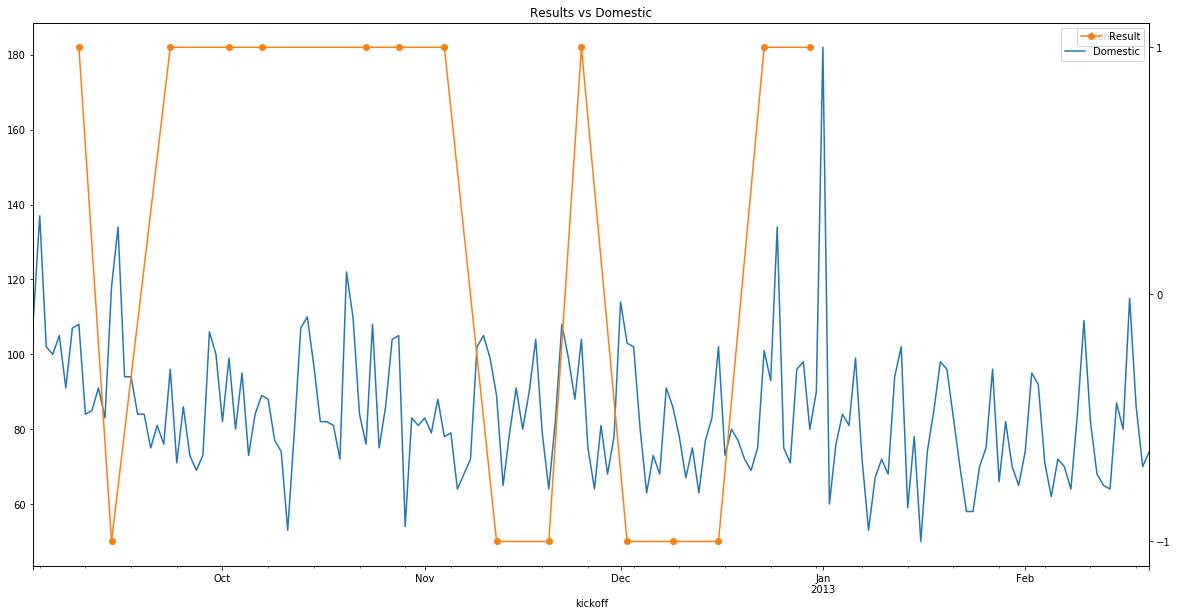

In [211]:

c1 = beacrime.loc['2012-09-02':'2013-02-20']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.legend(["Domestic"])
plt.title('Results vs Domestic')

ctest5 = beaRes.loc['2012-09-02':'2013-02-20']
ctest5['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

All seasons from 2010 to 2015...

<function matplotlib.pyplot.show>

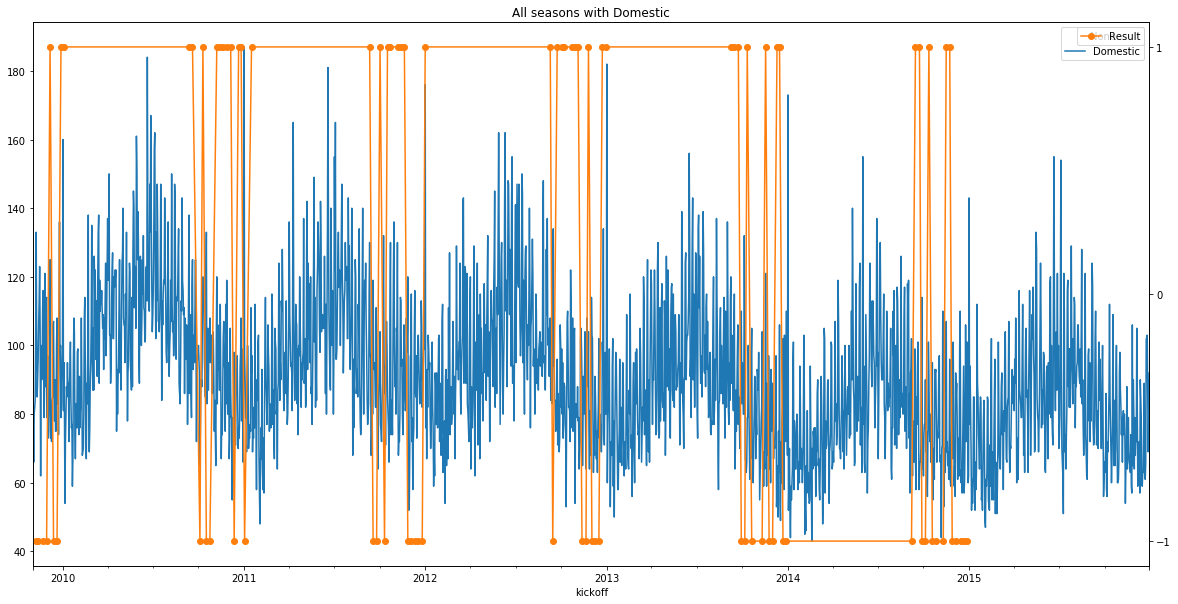

In [212]:
c1 = beacrime.loc['2009-11-02':'2015-12-30']
ass1 = c1[c1['Primary Type'] == "Domestic"]['Primary Type']
ass1.resample('D').count().plot()
plt.legend(['Domestic'])
plt.title('All seasons with Domestic')

ctest7 = beaRes.loc['2009-11-02':'2015-12-30']
ctest7['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

# Chicago Bears Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between October 2011 and November 2011 when their form was -4. The highest was from December 2012 to January 2012 with a sum of 2.  

In [213]:
chMonthly = beaRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['bea Res'])
chMonthly.sort_values(by=['bea Res'])

,bea Res
kickoff,
2015-01-31,-4.0
2009-11-30,-4.0
2012-01-31,-3.0
2013-11-30,-2.0
2014-11-30,-2.0
2007-09-30,-2.0
2008-01-31,-1.0
2014-01-31,-1.0
2011-09-30,-1.0


Showing the worst form...

<function matplotlib.pyplot.show>

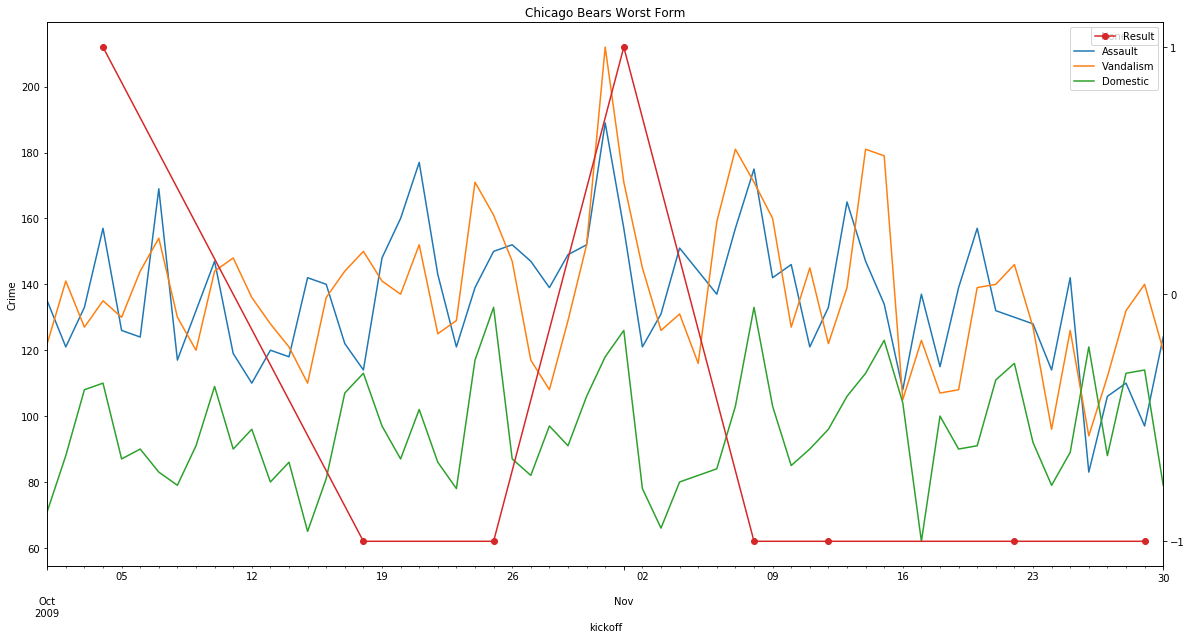

In [214]:
plt.subplot()

c = beacrime.loc['2009-10-01':'2009-11-30']
a1 = c[c['Primary Type'] == "Assault"]['Primary Type']
a1.resample('D').count().plot()

v1 = c[c['Primary Type'] == "Vandalism"]['Primary Type']
v1.resample('D').count().plot()

d1 = c[c['Primary Type'] == "Domestic"]['Primary Type']
d1.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Chicago Bears Worst Form')

ct = beaRes.loc['2009-10-01':'2009-11-30']
ct['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Each loss sees a rise in domestic violence, but the win in the middle of this bad form also gets a rise. In terms of vandalism the highest point is the day before that win. The losses also see spikes in vandalism. Assault is inconsistent with the results. 

Showing the best form with all three crimes...

<function matplotlib.pyplot.show>

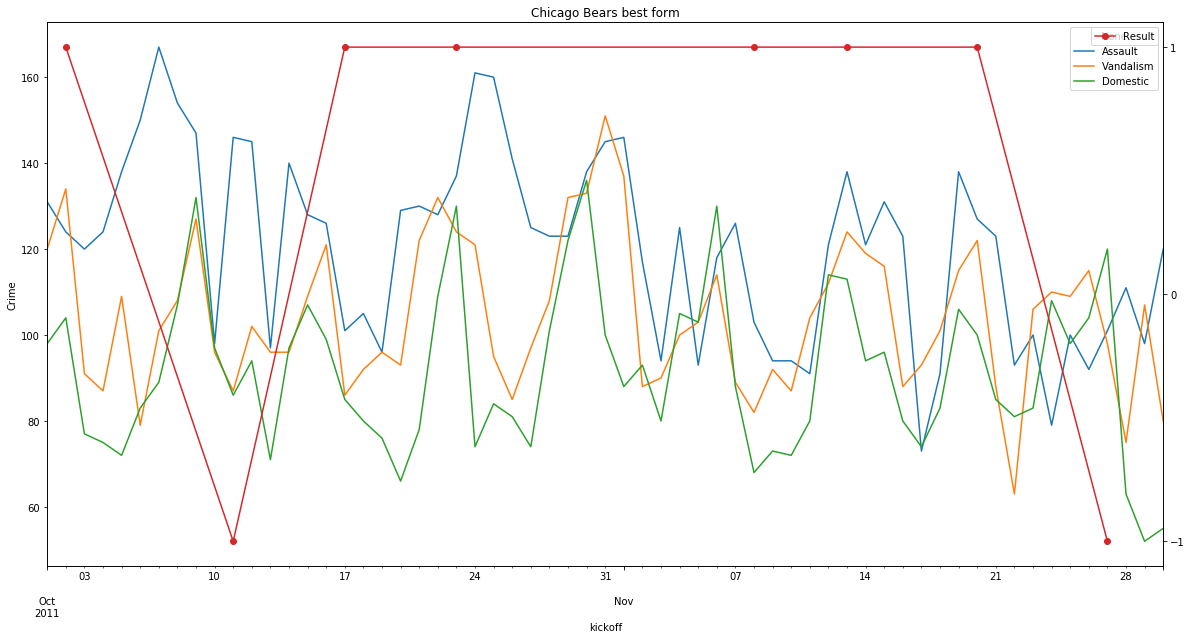

In [215]:
plt.subplot()

cp = beacrime.loc['2011-10-01':'2011-11-30']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Chicago Bears best form')

ctp = beaRes.loc['2011-10-01':'2011-11-30']
ctp['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

3/5 wins see a fall in assault, and 4/5 see a fall in domestic violence. 3/5 also see a fall in vandalism. All three see a fall from the start  of the good form.

# Chicago Bears Win/Lose Streaks

A function to create streak columns

In [216]:
def streaks(beaRes, col):
    sign = np.sign(beaRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return beaRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the beaRes dataframe..

In [217]:
beaRes = streaks(beaRes, 'bea Res')

In [218]:
beaRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127 entries, 2007-09-09 to 2014-12-28
Data columns (total 3 columns):
bea Res        127 non-null int32
lose_streak    127 non-null float64
win_streak     127 non-null float64
dtypes: float64(2), int32(1)
memory usage: 3.5 KB


Sorting the dataframe by the losing streak column..

In [219]:
beaRes.sort_values(by=['lose_streak'], ascending= False).head()

,bea Res,lose_streak,win_streak
kickoff,,,
2014-12-28,-1,5.0,0.0
2011-12-26,-1,5.0,0.0
2014-12-21,-1,4.0,0.0
2009-11-29,-1,4.0,0.0
2011-12-18,-1,4.0,0.0


<function matplotlib.pyplot.show>

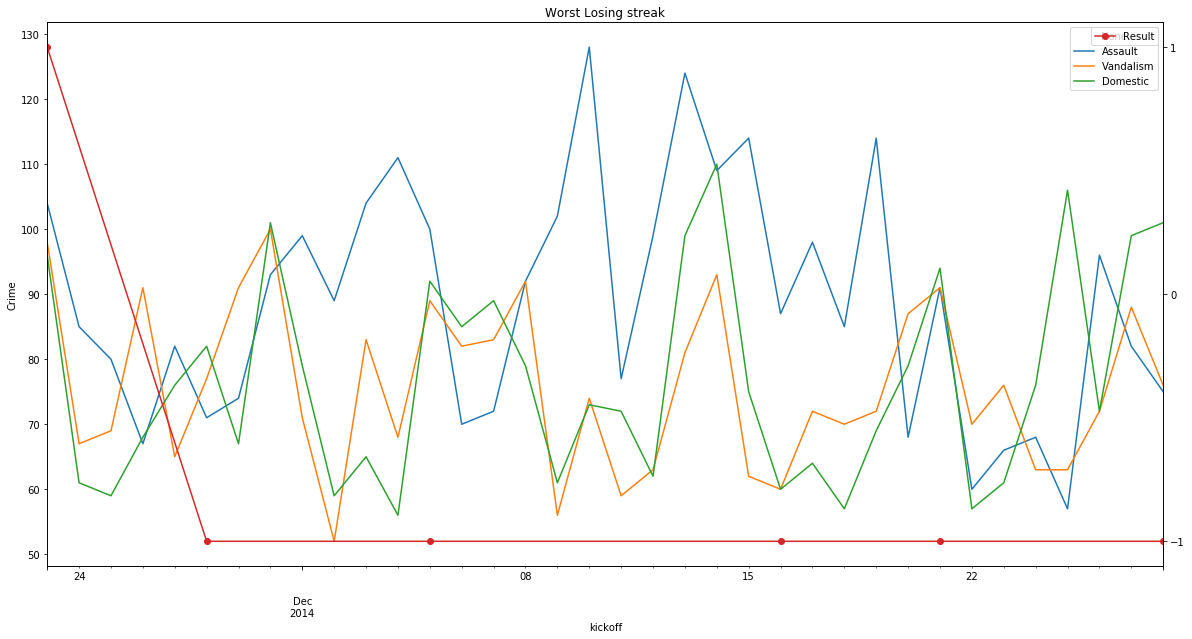

In [220]:
plt.subplot()

cp = beacrime.loc['2014-11-23':'2014-12-28']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()


v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Worst Losing streak')

ctp = beaRes.loc['2014-11-23':'2014-12-28']
ctp['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

<function matplotlib.pyplot.show>

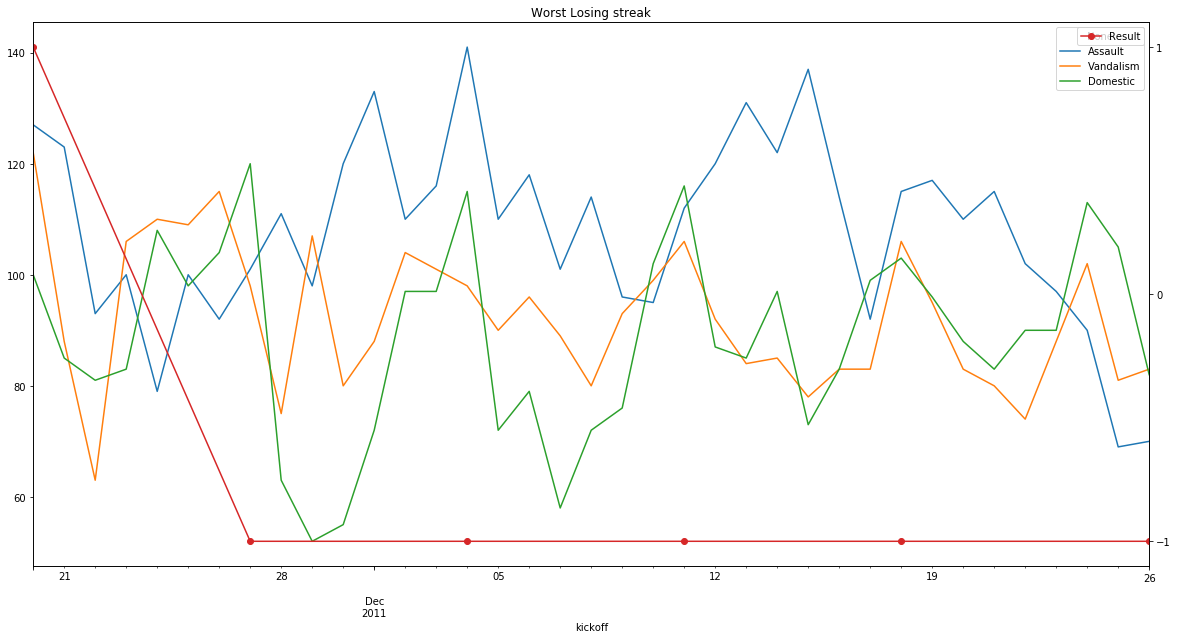

In [221]:
plt.subplot()

cp = beacrime.loc['2011-11-20':'2011-12-26']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()


v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Worst Losing streak')

ctp = beaRes.loc['2011-11-20':'2011-12-26']
ctp['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Biggest Losing Streak with Crimes')

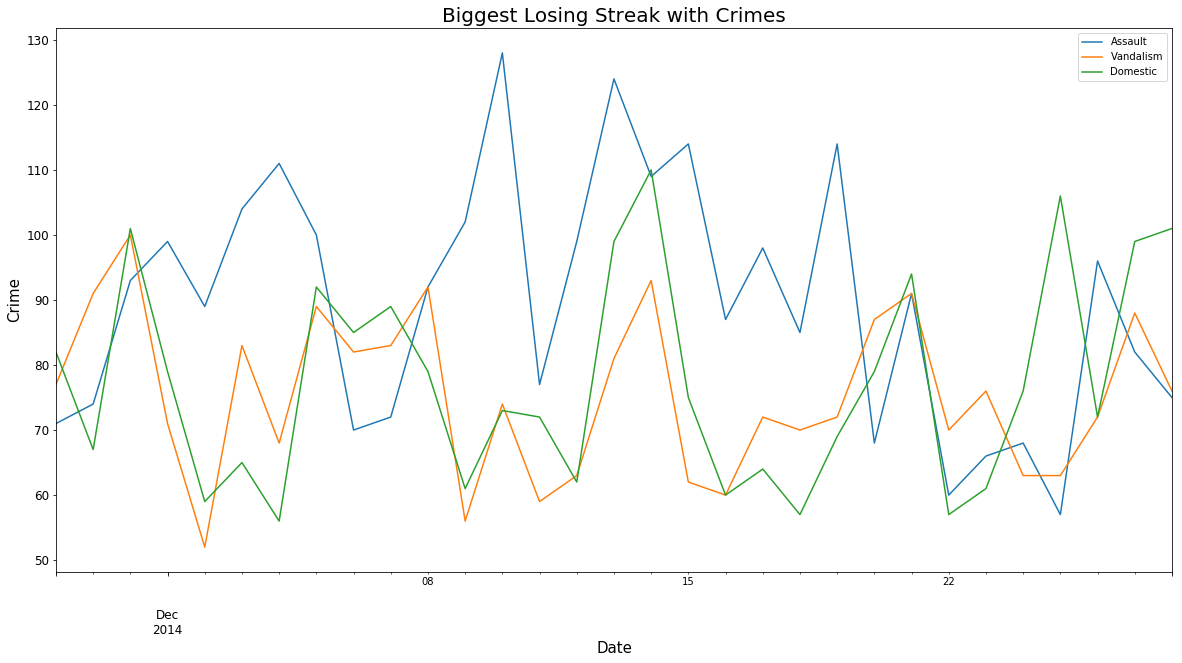

In [222]:
plt.subplot()

cp = beacrime.loc['2014-11-28':'2014-12-28']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Biggest Losing Streak with Crimes', fontsize = 20)

4/5 of the losses result in a rise in domestic violence. 3/5 see a rise in vandalism. However, only 1/5 see a rise in assault. 

Sorting the dataframe by the win streak column

In [223]:
beaRes.sort_values(beaRes.columns[2], ascending = False).head()

,bea Res,lose_streak,win_streak
kickoff,,,
2012-11-04,1,0.0,6.0
2012-10-28,1,0.0,5.0
2011-11-20,1,0.0,5.0
2013-09-23,1,0.0,5.0
2010-12-05,1,0.0,5.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

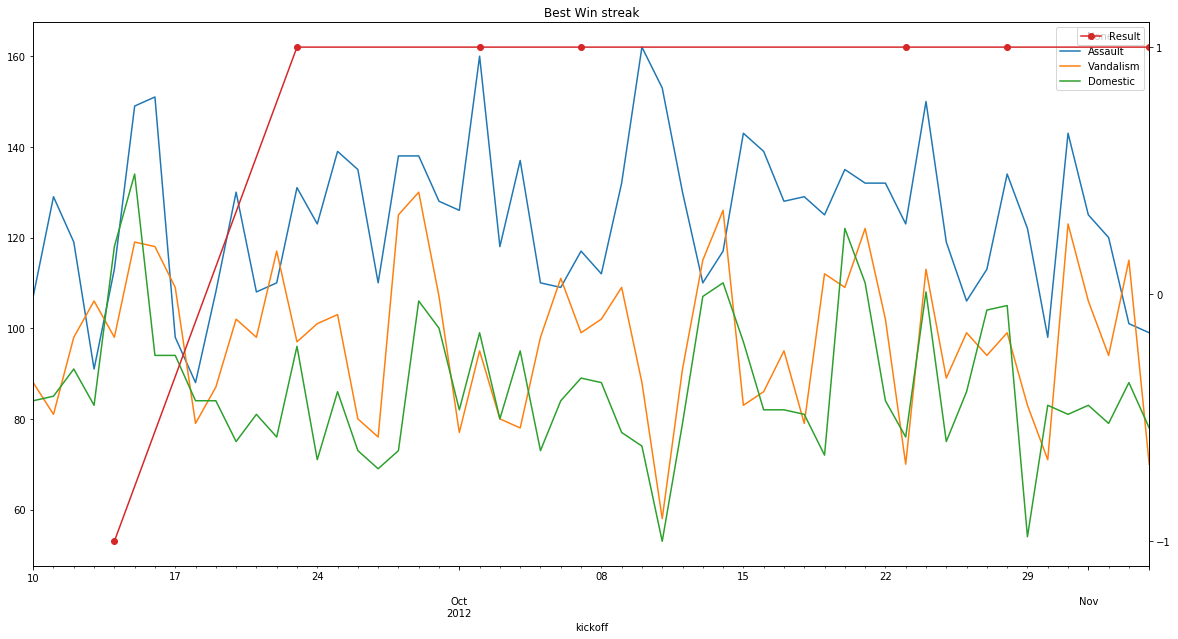

In [224]:
plt.subplot()
cp = beacrime.loc['2012-09-10':'2012-11-04']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot()
plt.legend(['Assault', 'Vandalism', 'Domestic'])

plt.title('Best Win streak')
ctp = beaRes.loc['2012-09-10':'2012-11-04']
ctp['bea Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Biggest Winning Streak with Crimes')

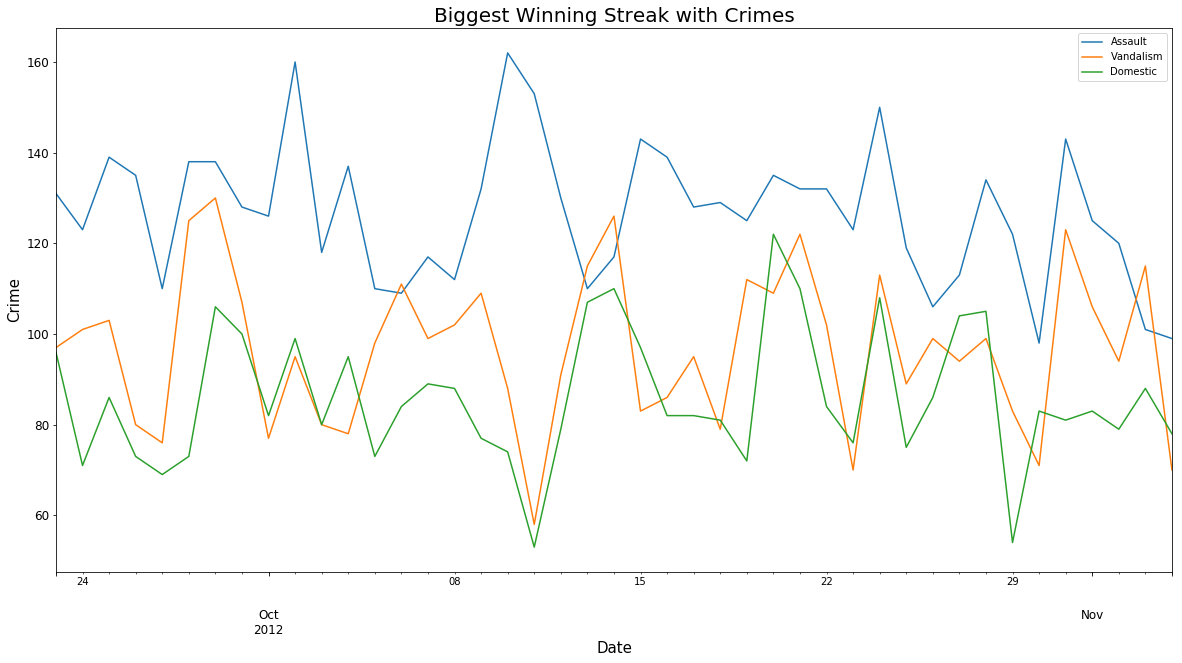

In [225]:
plt.subplot()

cp = beacrime.loc['2012-09-23':'2012-11-04']
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
a1p.resample('D').count().plot()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
v1p.resample('D').count().plot()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
d1p.resample('D').count().plot(figsize = (20, 10))
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
pylab.ylabel('Crime', fontsize = 15)
pylab.xlabel('Date', fontsize = 15)
plt.legend( ['Assault', 'Vandalism', 'Domestic'])
plt.title('Biggest Winning Streak with Crimes', fontsize = 20)

Only 1/5 wins result in a fall in domestic violence. 3/5 wins see a reduction in vandalism. 1/5 see a fall in assault. 

### Comparing Longest Streaks

In [226]:
cp = beacrime.loc['2014-11-28':'2014-12-28']

print('Daily average for Losing Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = beacrime.loc['2012-09-23':'2012-11-04']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 89.51612903225806
Vandalism = 75.35483870967742
Domestic = 77.45161290322581
 
Daily average for Winning Streak:
Assault = 126.76744186046511
Vandalism = 96.74418604651163
Domestic = 85.90697674418605


The winning streak has actally a far larger level of crime. The time differences aren't that far apart in terms of month but they are 2 years apart. 

### Comparison with period before longest streaks

In [227]:
cp = beacrime.loc['2012-08-13':'2012-09-23']

print('Period before Winning Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period during Winning Streak:')

cp0 = beacrime.loc['2012-09-23':'2012-11-04']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Period before Winning Streak:
Assault = 128.0952380952381
Vandalism = 98.5952380952381
Domestic = 98.97619047619048
 
Period during Winning Streak:
Assault = 126.76744186046511
Vandalism = 96.74418604651163
Domestic = 85.90697674418605


There is a drop in every crime during this winning streak. This could be due to happier fans? The drops however are marginal in terms of assault and vandalism, domestic violence is more significant. 

In [228]:
cp = beacrime.loc['2014-10-28':'2014-11-28']

print('Period before Losing Streak:')
a1p = cp[cp['Primary Type'] == "Assault"]['Primary Type']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Primary Type'] == "Vandalism"]['Primary Type']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Primary Type'] == "Domestic"]['Primary Type']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period during Losing Streak:')

cp0 = beacrime.loc['2014-11-28':'2014-12-28']
a1p0 = cp0[cp0['Primary Type'] == "Assault"]['Primary Type']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Primary Type'] == "Vandalism"]['Primary Type']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Primary Type'] == "Domestic"]['Primary Type']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Period before Losing Streak:
Assault = 94.625
Vandalism = 76.5
Domestic = 73.65625
 
Period during Losing Streak:
Assault = 89.51612903225806
Vandalism = 75.35483870967742
Domestic = 77.45161290322581


The losing streak has no negative effect on the rate of crime. 